72.39823529411764
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


LogisticRegression(max_iter=3000)

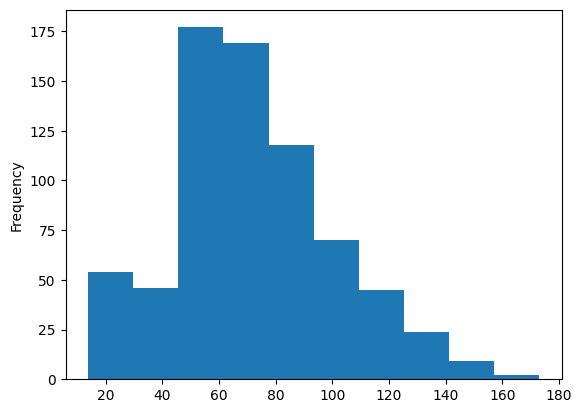

In [1]:
import math
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic_data = pd.read_csv('./train.csv')
titanic_data.head(10)
m = 2
c = 13

titanic_data['Age'] = m * titanic_data['Age'] + c
print(titanic_data['Age'].mean())
titanic_data
titanic_data['Age'].plot.hist()
titanic_data.info()
titanic_data.isnull().sum()
titanic_data.drop('Cabin', axis=1, inplace=True)
titanic_data.dropna(inplace=True)
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
embarked = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
titanic_data = pd.concat([titanic_data, sex, embarked, pcl], axis=1)
titanic_data.head(5)
titanic_data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic_data.drop('Pclass', axis=1, inplace=True)
x = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_convert = ['Q', 'male', 'S', 2, 3]  # Replace with the actual column names
for column in columns_to_convert:
    titanic_data[column] = label_encoder.fit_transform(titanic_data[column])
    titanic_data[column] = titanic_data[column].astype(int)

columns_to_convert = ['Q', 'male', 'S', 2, 3, 'Survived', 'SibSp', 'Parch', 'Fare']
for column in columns_to_convert:
    titanic_data[column] = label_encoder.fit_transform(titanic_data[column])
    titanic_data[column] = titanic_data[column].astype(int)

titanic_data= titanic_data.rename(str,axis="columns") 

x = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=3000)
log_model.fit(x_train, y_train)

In [2]:
# Create a DataFrame with the new data (replace the values with your actual data)
new_data = pd.DataFrame({
    'Age': [38.0 * 2 + 13],        # Example age value
    'SibSp': [1],         # Example SibSp value
    'Parch': [0],         # Example Parch value
    'Fare': [180],       # Example Fare value
    'male': [0],          # Example male value
    'Q': [0],             # Example Q value
    'S': [0],             # Example S value
    '2': [0],             # Example '2' value
    '3': [0]              # Example '3' value
})
predictions = log_model.predict(new_data)

# The 'predictions' variable now contains the preedicted values (0 or 1)
print(predictions)

[1]
